# Lipschitz Condition

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Locally Lipschitz Conditions: Overview
A function $ f: \mathbb{R}^n \to \mathbb{R}^m $ is **locally Lipschitz** if, for every point $ x \in \mathbb{R}^n $, there exists a neighborhood $ U \subset \mathbb{R}^n $ around $ x $ and a constant $ L > 0 $ such that:
$$
\|f(x) - f(y)\| \leq L \|x - y\|, \quad \forall x, y \in U.
$$
In contrast to global Lipschitz functions, the constant $ L $ need not be uniform over the entire domain.


#### Example 1: $ f(x) = x^2 $
The function:
$$
f(x) = x^2, \quad x \in \mathbb{R}.
$$
- **Local Lipschitz Property**: Around any point $ x_0 \in \mathbb{R} $, $ f(x) $ is Lipschitz over a small neighborhood. For example, in $ U = [x_0 - \epsilon, x_0 + \epsilon] $, we can bound:
  $$
  |f(x) - f(y)| = |x^2 - y^2| = |x + y||x - y|.
  $$
  Since $ x, y $ are in a bounded neighborhood, $ |x + y| $ can be bounded by a constant.
- **Not Globally Lipschitz**: For large $ x $, the term $ |x + y| $ grows unbounded, so $ L $ cannot be uniform globally.



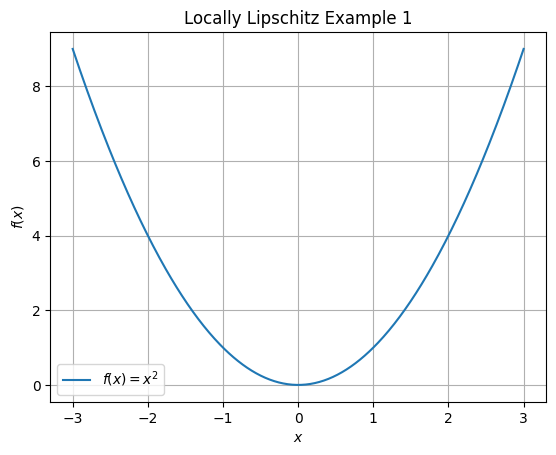

In [2]:
def f1(x):
    return x**2

# Generate input
x = np.linspace(-3, 3, 500)
y1 = f1(x)

# Plot
plt.plot(x, y1, label="$f(x) = x^2$")
plt.title("Locally Lipschitz Example 1")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.grid()
plt.legend()


#### Example 2: $ f(x) = |x^\frac{1}{3}| $

Let’s analyze the **locally Lipschitz property** of the function:

$$
f(x) = |x^{\frac{1}{3}}|, \quad x \in \mathbb{R}.
$$

##### Differentiability and derivative

For $x \neq 0$, we can compute the derivative.  Since $f(x) = |x|^{1/3}$, a quick way is to recall that $\frac{d}{dx}|x|$ is $\operatorname{sign}(x)$ for $x \neq 0$.  Thus, for $x \neq 0$,

$$
f'(x)
~=\,
\frac{d}{dx}\bigl(|x|^{1/3}\bigr)
~=\,
\frac{1}{3}\,|x|^{-2/3}\,\frac{d}{dx}(|x|)
~=\,
\frac{1}{3}\,|x|^{-2/3}\,\operatorname{sign}(x).
$$

Hence,

$$
|f'(x)|
~=\,
\frac{1}{3}\,|x|^{-2/3}, 
\quad
x \neq 0.
$$

Observe that $\lvert f'(x)\rvert \to \infty$ as $x \to 0$.  Since the derivative blows up near $0$, this is a strong indication that $f$ will **not** be Lipschitz near $0$.


##### Global Lipschitz continuity?

To see that $f$ is not globally Lipschitz on $\mathbb{R}$, we can check the difference quotient around $0$.  Let us test

$$
\frac{\bigl|f(x) - f(0)\bigr|}{|x-0|}
~=\,
\frac{|\,|x|^{1/3} - 0\,|}{|x|}
~=\,
\frac{|x|^{1/3}}{|x|}
~=\,
|x|^{-2/3}.
$$

As $x \to 0$, we have $|x|^{-2/3} \to \infty$.  This shows that there cannot be a single global constant $L$ satisfying

$$
\bigl|f(x) - f(0)\bigr| \le L\,|x|
\quad\text{for all small }x,
$$

because the left-hand side “ratio” can become arbitrarily large near $0$.  
Hence, **$f$ is not globally Lipschitz on $\mathbb{R}$.**


##### Local Lipschitz continuity

1. **Away from 0:**  

   For any interval $[a,b]$ that does not contain $0$ (for instance, $[1,\infty)$ or $(-\infty,-1]$), the function $f$ is differentiable on that interval with a derivative that stays finite on $[a,b]$.  Indeed, if $\min|x| \ge m > 0$ on that interval, then

   $$
   |f'(x)| 
   = 
   \frac{1}{3}|x|^{-2/3} 
   \le 
   \frac{1}{3}\,m^{-2/3},
   $$

   which is finite.  By the Mean Value Theorem (or the bounded-derivative criterion for Lipschitz continuity), $f$ is Lipschitz on any such interval that stays away from $0$.

2. **At 0 (local neighborhood):**  

   We ask if there is a neighborhood around $0$ on which $f$ is Lipschitz.  Again, consider

   $$
   \frac{|f(x) - f(0)|}{|x - 0|} 
   ~=~
   |x|^{-2/3}.
   $$

   As $x \to 0$, this ratio $\to\infty$.  Therefore, no matter how small the neighborhood around $0$ is, we cannot find a finite Lipschitz constant $L$ that works for all $x$ and $y$ near $0$.  

   Concretely, if $f$ were locally Lipschitz at $0$, there would exist some $\delta>0$ and $L>0$ such that for all $|x|<\delta$,

   $$
   |\,|x|^{1/3} - 0| 
   \;=\; 
   |x|^{1/3}
   \;\le\; 
   L\,|x|.
   $$

   However, $\tfrac{|x|^{1/3}}{|x|} = |x|^{-2/3}$ can be made as large as we want by taking $|x|$ sufficiently small.  This is a contradiction.  

Hence, **$f$ is not locally Lipschitz at $0$.**

##### Summary of Lipschitz properties

1. **Not globally Lipschitz.**  The derivative near $0$ blows up, and equivalently, the difference quotient $\frac{|x|^{1/3}}{|x|}$ grows unboundedly near $0$.  

2. **Not locally Lipschitz at $0$.**  Same reason: near $0$, the difference quotient goes to infinity.  


c:\Users\emirc\miniconda3\envs\sandbox\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\emirc\miniconda3\envs\sandbox\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


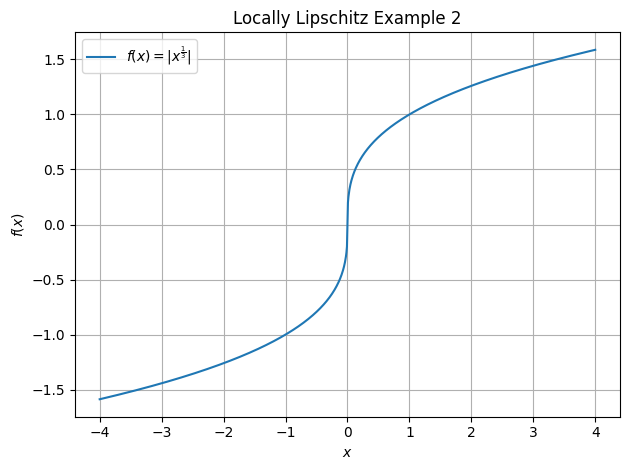

In [3]:
def f2(x):
    return np.sign(x.real) * np.abs(x**(1.0/3.0))

x = np.linspace(-4, 4, 1001, dtype=complex)
y2 = f2(x).real


plt.plot(x, y2, label=r"$f(x) = |x^{\frac{1}{3}}| $")
plt.title("Locally Lipschitz Example 2")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


### Global Lipschitz Condition: Overview

A function $ f: \mathbb{R}^n \to \mathbb{R}^m $ is **globally Lipschitz** if there exists a constant $ L > 0 $ such that:
$$
\|f(x) - f(y)\| \leq L \|x - y\|, \quad \forall x, y \in \mathbb{R}^n.
$$
This implies that the function's rate of change is uniformly bounded across its entire domain.



#### Example 3: Linear Function
The function:
$$
f(x) = kx, \quad x \in \mathbb{R}, \, k \in \mathbb{R}.
$$
- **Global Lipschitz Property**: The difference is:
  $$
  |f(x) - f(y)| = |kx - ky| = |k||x - y|.
  $$
  Here, the Lipschitz constant is $ L = |k| $, valid for all $ x, y \in \mathbb{R} $.

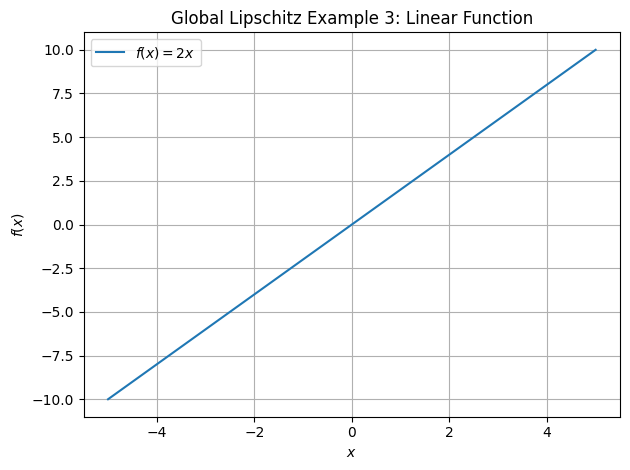

In [4]:
# Define functions
def f3(x):
    k = 2
    return k * x  # Linear function

# Generate input
x = np.linspace(-5, 5, 500)
y3 = f3(x)

# Plot
plt.plot(x, y3, label="$f(x) = 2x$")
plt.title("Global Lipschitz Example 3: Linear Function")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

#### Example 4: Bounded Nonlinear Function
The function:
$$
f(x) = \tanh(x), \quad x \in \mathbb{R}.
$$
- **Global Lipschitz Property**: The derivative is:
  $$
  f'(x) = 1 - \tanh^2(x).
  $$
  Since $ \tanh(x) $ is bounded by $ [-1, 1] $, the derivative satisfies $ |f'(x)| \leq 1 $. Therefore, the function is globally Lipschitz with $ L = 1 $.


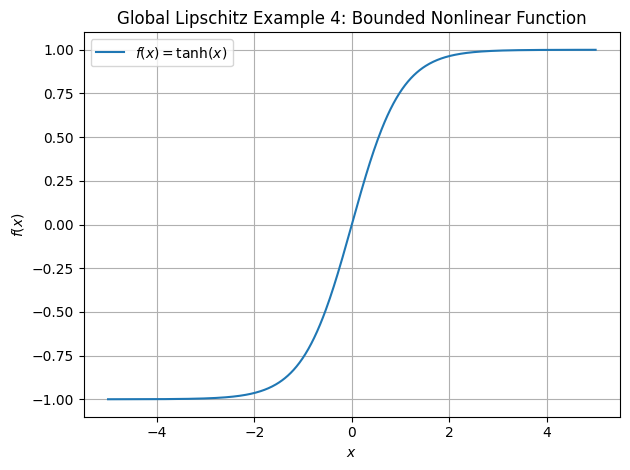

In [5]:
def f4(x):
    return np.tanh(x)  # Tanh function

# Generate input
x = np.linspace(-5, 5, 500)
y4 = f4(x)

plt.plot(x, y4, label="$f(x) = \\tanh(x)$")
plt.title("Global Lipschitz Example 4: Bounded Nonlinear Function")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()